## Seattle Police Department dataset


## Description
This data represents crime reported to the Seattle Police Department (SPD). Each row contains the record of a unique event where at least one criminal offense was reported by a member of the community or detected by an officer in the field. The Dataset is used in meetings for strategic planning, accountability and performance managment. 
This updated process includes all records of crime reports logged in the Departments Records Management System (RMS) since 2008, which are tracked as part of the SeaStat process. Records are evolved daily and are continually refreshed. 

For more information visit https://data.seattle.gov/Public-Safety/Crime-Data/4fs7-3vj5

OpenML project: https://www.openml.org/d/41960

### Problem statement: Build a ML model that will predict the accuracy for an Primary Offense by a given all other feature variables (e.g. Neighborhood, Beat, etc.)
* **Target** is Primary Offense Description
* **Features** are the other variables

### Load Pandas and Numpy Library


In [1]:
# Setup
# display full output in Jupyter, not only last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load necessary libraries
import pandas as pd
import numpy as np

### Set Options for Displaying Data

Customize behaviour and display-related options to expand the output display to see more columns

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Load Dataset

The Seattle Police Crime Dataset is been loading and saved into a variable. The first 10 columns are being display. The shape gives an overview over the total number of data and columns

In [4]:
crime = pd.read_csv("Seattle_Crime_Data_06-23-2019-4.csv", low_memory=False) # load dataset into jupyter
crime.head(10) # display first 10 columns 
crime.shape # Total Number of data with number of columns

,Report_Number,Occurred_Time,Reported_Time,Crime_Subcategory,Primary_Offense_Description,Precinct,Sector,Beat,Neighborhood
0,1975000079415,900,1500,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,'LAKEWOOD/SEWARD PARK'
1,1976000069169,1,2359,'SEX OFFENSE-OTHER','SEXOFF-INDECENT LIBERTIES',UNKNOWN,?,?,UNKNOWN
2,1979000049118,1600,1430,'CAR PROWL',THEFT-CARPROWL,EAST,G,G2,'CENTRAL AREA/SQUIRE PARK'
3,19810000305573,2029,2030,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP
4,1981000076456,2000,435,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,'ROXHILL/WESTWOOD/ARBOR HEIGHTS'
5,19880000507482,155,155,'MOTOR VEHICLE THEFT',VEH-THEFT-AUTO,WEST,M,M2,SLU/CASCADE
6,19930000465323,2213,2213,HOMICIDE,HOMICIDE-PREMEDITATED-GUN,SOUTH,R,R2,'CLAREMONT/RAINIER VISTA'
7,19940000264046,0,844,'THEFT-ALL OTHER',THEFT-OTH,SOUTHWEST,F,F1,'HIGH POINT'
8,19960000543964,1130,1700,'CAR PROWL',THEFT-CARPROWL,SOUTH,O,O1,SODO
9,19990000333737,?,?,THEFT-SHOPLIFT,THEFT-SHOPLIFT,UNKNOWN,?,?,UNKNOWN


(523590, 9)

* 523590 = Total number of data
* 9 = Columns / features


The table shows no **NaN** values that the data set seems not to have missing values. But it is clear from the first few rows that there are values corresponding to missing **'?'**, **'UNKNOWN'**.

In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523590 entries, 0 to 523589
Data columns (total 9 columns):
Report_Number                  523590 non-null int64
Occurred_Time                  523590 non-null object
Reported_Time                  523590 non-null object
Crime_Subcategory              523590 non-null object
Primary_Offense_Description    523590 non-null object
Precinct                       523590 non-null object
Sector                         523590 non-null object
Beat                           523590 non-null object
Neighborhood                   523590 non-null object
dtypes: int64(1), object(8)
memory usage: 36.0+ MB


We can see that there are quite a lot of NaN in Precint, Sector, Beat, Neighborhood and Crime_subcategory. To decide how do deal with them, we have to understand the meaning of each feature

Each row is a **unique crime report record**
**Columns in the Dataset**
* **Report Number** = Unique ID
* **Occured Time** = Time the offense occured on the 24 hour clock
* **Reprted Time** = Time the offense has been reported on the 24 hour clock
* **Crime Subcategory** = More detailed description of the Primary Offense
* **Primary Offense** = Description of the occured offense
* **Precinct** = District where offense occured
* **Sector** = Sector of the district
* **Beats** = Granular unit of management for patrol deployment
* **Neighborhood** = Location of the occured offense

**Note: The Dataset doesn't provide any dates**

## Preprocessing

### Handling missing data

The data includes some missing data called **“?”** or **“unknown”**. Treating missing values, the data set is loaded again and all missing values are replaced using **“NaN”** to find and handle missing values faster.

In [6]:
crime_nan = crime.apply(lambda x: x.replace(['?', 'UNKNOWN'], np.nan)) #Lambda functions replaces '?' and 'UNKNOWN' values with 'NaN'
crime_nan.head(10) # display first 10 rows
crime_nan.shape

,Report_Number,Occurred_Time,Reported_Time,Crime_Subcategory,Primary_Offense_Description,Precinct,Sector,Beat,Neighborhood
0,1975000079415,900,1500,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,'LAKEWOOD/SEWARD PARK'
1,1976000069169,1,2359,'SEX OFFENSE-OTHER','SEXOFF-INDECENT LIBERTIES',NaN,NaN,NaN,NaN
2,1979000049118,1600,1430,'CAR PROWL',THEFT-CARPROWL,EAST,G,G2,'CENTRAL AREA/SQUIRE PARK'
3,19810000305573,2029,2030,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP
4,1981000076456,2000,435,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,'ROXHILL/WESTWOOD/ARBOR HEIGHTS'
5,19880000507482,155,155,'MOTOR VEHICLE THEFT',VEH-THEFT-AUTO,WEST,M,M2,SLU/CASCADE
6,19930000465323,2213,2213,HOMICIDE,HOMICIDE-PREMEDITATED-GUN,SOUTH,R,R2,'CLAREMONT/RAINIER VISTA'
7,19940000264046,0,844,'THEFT-ALL OTHER',THEFT-OTH,SOUTHWEST,F,F1,'HIGH POINT'
8,19960000543964,1130,1700,'CAR PROWL',THEFT-CARPROWL,SOUTH,O,O1,SODO
9,19990000333737,NaN,NaN,THEFT-SHOPLIFT,THEFT-SHOPLIFT,NaN,NaN,NaN,NaN


(523590, 9)

### Computation missing values for each column

To have an overview over the missing values, missing data is counted using the **sum()** operation. Approximately 3600 rows contain missing values 

In [7]:
print(crime_nan.isnull().sum()) # Computate the sum of missing values (NaN) for each column

Report_Number                     0
Occurred_Time                     2
Reported_Time                     2
Crime_Subcategory               262
Primary_Offense_Description       0
Precinct                       3352
Sector                         3346
Beat                           3298
Neighborhood                   3366
dtype: int64


#### Dropping remaing NaN vaules from the dataset and creatingnew dataset called crime_sub

In [8]:
crime_sub = crime_nan.dropna() # Create subset without missing values
print(crime_sub.isnull().sum()) # Check if any missing values are left 
print(crime_sub.head(10)) # Display first 10 columns of new subset
crime_sub.shape #Total Number of data with number of columns (3629 rows deleted)

Report_Number                  0
Occurred_Time                  0
Reported_Time                  0
Crime_Subcategory              0
Primary_Offense_Description    0
Precinct                       0
Sector                         0
Beat                           0
Neighborhood                   0
dtype: int64
     Report_Number Occurred_Time Reported_Time      Crime_Subcategory   Primary_Offense_Description   Precinct Sector Beat                      Neighborhood
0    1975000079415           900          1500   BURGLARY-RESIDENTIAL            BURGLARY-FORCE-RES      SOUTH      R   R3            'LAKEWOOD/SEWARD PARK'
2    1979000049118          1600          1430            'CAR PROWL'                THEFT-CARPROWL       EAST      G   G2        'CENTRAL AREA/SQUIRE PARK'
3   19810000305573          2029          2030               HOMICIDE  HOMICIDE-PREMEDITATED-WEAPON      SOUTH      S   S2                   BRIGHTON/DUNLAP
4    1981000076456          2000           435   BURGLARY-RESI

(519961, 9)

### Create new column

To better understand the dataset we decided to create a new column “Response time”. This column should have demonstrated the time between the time of crime and the time of the reporting of that crime. Unfortunately, the dataset does not contain any dates. So we don’t know whether the crime was reported on the same day or maybe a day after. Therefore sometimes negative Response Times are being displayed.

In [9]:
# Create new Column 'Response Time' by subtracting 'Reportied Time - Occured Time'
crime_sub['Response_Time'] = pd.to_numeric(crime_sub['Reported_Time'], errors='coerce') - pd.to_numeric(crime_sub['Occurred_Time'], errors='coerce')
# Note: Negative Values appear due to the lack of dates

C:\Users\erenu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
# Put new column Response Time after the columns Occured Time and Reported Time
crime_sub = crime_sub[["Report_Number","Occurred_Time","Reported_Time", "Response_Time","Crime_Subcategory", "Primary_Offense_Description", "Precinct", "Sector", "Beat", "Neighborhood"]] 
print(crime_sub.head(10)) ## Display first 10 columns

     Report_Number Occurred_Time Reported_Time  Response_Time      Crime_Subcategory   Primary_Offense_Description   Precinct Sector Beat                      Neighborhood
0    1975000079415           900          1500            600   BURGLARY-RESIDENTIAL            BURGLARY-FORCE-RES      SOUTH      R   R3            'LAKEWOOD/SEWARD PARK'
2    1979000049118          1600          1430           -170            'CAR PROWL'                THEFT-CARPROWL       EAST      G   G2        'CENTRAL AREA/SQUIRE PARK'
3   19810000305573          2029          2030              1               HOMICIDE  HOMICIDE-PREMEDITATED-WEAPON      SOUTH      S   S2                   BRIGHTON/DUNLAP
4    1981000076456          2000           435          -1565   BURGLARY-RESIDENTIAL            BURGLARY-FORCE-RES  SOUTHWEST      W   W3  'ROXHILL/WESTWOOD/ARBOR HEIGHTS'
5   19880000507482           155           155              0  'MOTOR VEHICLE THEFT'                VEH-THEFT-AUTO       WEST      M   M2   

### Determine amount and percentage for each offense

A simple computation is used to determinte the amount and percentage for each offense

In [11]:
Crime_Subcategory=pd.DataFrame(crime_sub["Crime_Subcategory"].value_counts()) # Count the amount for each offense
Crime_Subcategory.columns=["Amount"] # Create new column named 'Amount'
Crime_Subcategory["Percentage"]= Crime_Subcategory["Amount"]/Crime_Subcategory["Amount"].sum()*100 # Create new column named 'percentage' and computate it
print(Crime_Subcategory) # Print Subcategory with its Amount and Percentage

                                       Amount  Percentage
'CAR PROWL'                            147593   28.385398
'THEFT-ALL OTHER'                       53996   10.384625
THEFT-SHOPLIFT                          48607    9.348201
BURGLARY-RESIDENTIAL                    46772    8.995290
'MOTOR VEHICLE THEFT'                   43442    8.354857
BURGLARY-COMMERCIAL                     23499    4.519377
THEFT-BUILDING                          21394    4.114539
TRESPASS                                17661    3.396601
NARCOTIC                                16924    3.254859
'AGGRAVATED ASSAULT'                    15482    2.977531
DUI                                     12716    2.445568
ROBBERY-STREET                          11747    2.259208
THEFT-BICYCLE                           11068    2.128621
'BURGLARY-RESIDENTIAL-SECURE PARKING'    8845    1.701089
'AGGRAVATED ASSAULT-DV'                  6864    1.320099
'FAMILY OFFENSE-NONVIOLENT'              6700    1.288558
'SEX OFFENSE-O

### Plotting the Crime Subcategory
To better understand the dataset and to illustrate the data , we plotted the relative share of the top ten Crime Subcategories

                    Crime  Amount  Percentage
0             'CAR PROWL'  147593   28.385398
1       'THEFT-ALL OTHER'   53996   10.384625
2          THEFT-SHOPLIFT   48607    9.348201
3    BURGLARY-RESIDENTIAL   46772    8.995290
4   'MOTOR VEHICLE THEFT'   43442    8.354857
5     BURGLARY-COMMERCIAL   23499    4.519377
6          THEFT-BUILDING   21394    4.114539
7                TRESPASS   17661    3.396601
8                NARCOTIC   16924    3.254859
9    'AGGRAVATED ASSAULT'   15482    2.977531
10                  Other   84591   16.268720


([<matplotlib.patches.Wedge at 0x23e92003630>,
 [Text(-0.8559916984731287, 0.6908532493555258, "'CAR PROWL'"),
  Text(-0.9440709148893909, -0.5645618723044522, "'THEFT-ALL OTHER'"),
  Text(-0.440404263090542, -1.0079901215050062, 'THEFT-SHOPLIFT'),
  Text(0.17998297955911105, -1.0851756203808787, 'BURGLARY-RESIDENTIAL'),
  Text(0.7165422598094132, -0.8346060087893086, "'MOTOR VEHICLE THEFT'"),
  Text(0.987162287321588, -0.4852943627222667, 'BURGLARY-COMMERCIAL'),
  Text(1.0810946813477083, -0.20306228099205814, 'THEFT-BUILDING'),
  Text(1.0986086077265687, 0.055309375598452365, 'TRESPASS'),
  Text(1.0632367493036559, 0.28200640937786287, 'NARCOTIC'),
  Text(0.9880578462539922, 0.4834683986114528, "'AGGRAVATED ASSAULT'"),
  Text(0.5380476968991417, 0.9594293490724211, 'Other')],
 [Text(-0.4669045628035247, 0.376829045103014, '28.4%'),
  Text(-0.5149477717578494, -0.3079428394387921, '10.4%'),
  Text(-0.2402205071402956, -0.5498127935481851, '9.3%'),
  Text(0.09817253430496965, -0.591913

(-1.10944260776038, 1.100998581477772, -1.1043558702064555, 1.1002074307911556)

Text(0.5, 1.0, 'Types of Crimes')

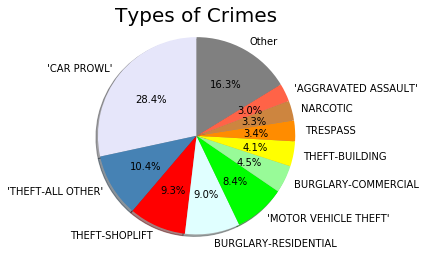

In [13]:
Crime_Subcategory=pd.DataFrame(crime_sub["Crime_Subcategory"].value_counts()) # Count the amount of each offense
Crime_Subcategory.columns=["Amount"] # Create new column named 'Amount'
Crime_Subcategory['Crime'] = Crime_Subcategory.index # Index the Subcategory column as 'Crime'
Crime_Subcategory= Crime_Subcategory[['Crime', "Amount"]] #Take the two columns 'Crime' and 'Amount' into the Crime Subcategory
Crime_Subcategory.index = range(len(Crime_Subcategory)) # Index the Crime_Subcategory with its range
Other = Crime_Subcategory.iloc[10:] #Put all left crimes together in the Crime option 'Other'
Other = Other["Amount"].sum() # Computate the Amount for each offense
Crime_Subcategory=Crime_Subcategory.iloc[0:10] # Display the top ten offenses with the highest number of offenses
Crime_Subcategory = Crime_Subcategory.append({'Crime':'Other', 'Amount':Other} , ignore_index=True) # Set an appendix for the Other option
Crime_Subcategory["Percentage"]= Crime_Subcategory["Amount"]/Crime_Subcategory["Amount"].sum()*100 # Computate the precantage for the offenes in relation with the total number of offenses
print(Crime_Subcategory) # display the results
import matplotlib.pyplot as plt # import matplob library for visualisation
color=("lavender", "steelblue","red","lightcyan","lime","palegreen","yellow",
       "darkorange","peru","tomato", "gray") # define the shown colors
fig1, ax1 = plt.subplots() # set the parameters
ax1.pie(Crime_Subcategory["Percentage"], labels=Crime_Subcategory["Crime"], autopct='%1.1f%%',
        shadow=True, startangle=90, colors=color) # create the pie chart with the names and the percanteges
ax1.axis('equal') #  changes limit of axis so that equal increments have the same length
ax1.set_title("Types of Crimes", fontdict={'fontsize': 20, 'fontweight': 'medium'}) # Headline of the pie chart
plt.show() # display the pie chart

# occasionaly run twice to see the pie chart

### Neighborhood value count

We count how often one Neigborhood occures in the dataset and display it afterwards

In [14]:
Neighborhood=crime_sub["Neighborhood"].value_counts()
print(crime_sub.head(10))
print(Neighborhood)

     Report_Number Occurred_Time Reported_Time  Response_Time      Crime_Subcategory   Primary_Offense_Description   Precinct Sector Beat                      Neighborhood
0    1975000079415           900          1500            600   BURGLARY-RESIDENTIAL            BURGLARY-FORCE-RES      SOUTH      R   R3            'LAKEWOOD/SEWARD PARK'
2    1979000049118          1600          1430           -170            'CAR PROWL'                THEFT-CARPROWL       EAST      G   G2        'CENTRAL AREA/SQUIRE PARK'
3   19810000305573          2029          2030              1               HOMICIDE  HOMICIDE-PREMEDITATED-WEAPON      SOUTH      S   S2                   BRIGHTON/DUNLAP
4    1981000076456          2000           435          -1565   BURGLARY-RESIDENTIAL            BURGLARY-FORCE-RES  SOUTHWEST      W   W3  'ROXHILL/WESTWOOD/ARBOR HEIGHTS'
5   19880000507482           155           155              0  'MOTOR VEHICLE THEFT'                VEH-THEFT-AUTO       WEST      M   M2   

### Plotting the Neighborhood
To better understand the dataset and to illustrate the data it, we plotted the relative share of the top ten Neighborhood

([<matplotlib.patches.Wedge at 0x23e920cf710>,
 [Text(0.5174654758826863, 0.9706850577141409, "'DOWNTOWN COMMERCIAL'"),
  Text(0.008807755278797248, 1.0999647373652253, 'NORTHGATE'),
  Text(-0.3913778255346501, 1.0280191621170147, "'CAPITOL HILL'"),
  Text(-0.7210688059779894, 0.8306983670656135, "'QUEEN ANNE'"),
  Text(-0.9380618934977233, 0.5744909781427958, 'SLU/CASCADE'),
  Text(-1.0563855952493157, 0.30667486716349757, 'UNIVERSITY'),
  Text(-1.0991599480312342, 0.042981491877024984, 'ROOSEVELT/RAVENNA'),
  Text(-1.0836517853641165, -0.18894128208828032, "'BALLARD SOUTH'"),
  Text(-1.0295307271164869, -0.3873841529063858, "'CHINATOWN/INTERNATIONAL DISTRICT'"),
  Text(-0.9402366810778827, -0.5709246741520705, 'BELLTOWN'),
  Text(0.7186465612487547, -0.8327947646361258, 'Other')],
 [Text(0.2822538959360107, 0.5294645769349859, '9.4%'),
  Text(0.004804230152071225, 0.5999807658355774, '5.9%'),
  Text(-0.21347881392799095, 0.5607377247910988, '5.9%'),
  Text(-0.39331025780617596, 0.453

(-1.1010236114184264,
 1.1046309692247638,
 -1.1095310969486885,
 1.100941108691042)

Text(0.5, 1.0, 'Neighborhood of Crimes')

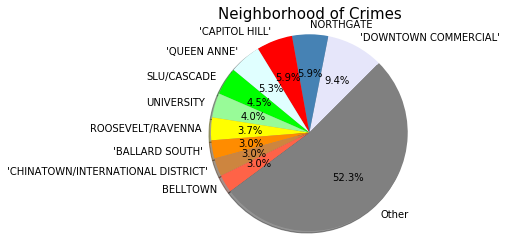

In [15]:
# Note: Same method for plotting is used as for Crime Subcategories
Neighborhood=pd.DataFrame(crime_sub["Neighborhood"].value_counts())
Neighborhood.columns=["Amount"]
Neighborhood['Neighborhood'] = Neighborhood.index
Neighborhood= Neighborhood[['Neighborhood', "Amount"]]
Neighborhood.index = range(len(Neighborhood))
Other = Neighborhood.iloc[10:]
Other = Other["Amount"].sum()
Neighborhood=Neighborhood.iloc[0:10]
Neighborhood = Neighborhood.append({'Neighborhood':'Other', 'Amount':Other} , ignore_index=True)
Neighborhood["Percentage"]= Neighborhood["Amount"]/Neighborhood["Amount"].sum()*100
import matplotlib.pyplot as plt
color=("lavender", "steelblue","red","lightcyan","lime","palegreen","yellow",
       "darkorange","peru","tomato", "gray")
fig1, ax1 = plt.subplots()
ax1.pie(Neighborhood["Percentage"], labels=Neighborhood["Neighborhood"], autopct='%1.1f%%',
        shadow=True, startangle=45, colors=color)
ax1.axis('equal')
ax1.set_title("Neighborhood of Crimes", fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.show()

## Model Building

### Load scikit toolkit

Classifier implementing the k-nearest neighbors vote

In [16]:
from sklearn.neighbors import KNeighborsClassifier # import KNeighborsClassifier module
from sklearn import svm # import svm module
from sklearn.model_selection import train_test_split # import the train_test_split

# Import needed libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import re

## Preparing the dataset by featursizing

### Data preprocessing

Prepare and transform raw data into a understandable format

In [17]:
crime_sub['Primary_Offense_Description'].nunique()

142

142 Primary Offenses are given in the dataset

In [18]:
# display all primary offenses one by one
pri_off = pd.DataFrame(crime_sub[("Primary_Offense_Description")].unique())
print(pri_off[0])

0                      BURGLARY-FORCE-RES
1                          THEFT-CARPROWL
2            HOMICIDE-PREMEDITATED-WEAPON
3                          VEH-THEFT-AUTO
4               HOMICIDE-PREMEDITATED-GUN
5                               THEFT-OTH
6                              DUI-LIQUOR
7                  ASSLT-AGG-DV-BODYFORCE
8                          RAPE-STRONGARM
9             'SEXOFF-INDECENT LIBERTIES'
10                          ASSLT-AGG-GUN
11               ROBBERY-STREET-BODYFORCE
12                   ASSLT-AGG-POLICE-GUN
13                       ASSLT-AGG-WEAPON
14                           SEXOFF-OTHER
15                  BURGLARY-FORCE-NONRES
16        HOMICIDE-PREMEDITATED-BODYFORCE
17                   BURGLARY-NOFORCE-RES
18                     VEH-THEFT-MTRCYCLE
19                         THEFT-PKPOCKET
20                          THEFT-BICYCLE
21                    NARC-POSSESS-MARIJU
22                           PROSTITUTION
23                          ARSON-

#### To clean the dataset, we will copy it into crime_sub_clean and combine some sub-categories of the target variable

In [19]:
crime_sub_clean = crime_sub
crime_sub_clean['New_Pri_Off'] = crime_sub['Primary_Offense_Description']

In [20]:
# Calculate the sum for each offense and display it
crime_sub_clean.groupby(['New_Pri_Off'])['New_Pri_Off'].count()

New_Pri_Off
'ADULT-VULNERABLE-PHYSICAL ABUSE'         92
'BURGLARY-SECURE PARKING-NONRES'        1163
'BURGLARY-SECURE PARKING-RES'           8845
'CHILD-HARBOR MINOR'                      15
'DISORDERLY CONDUCT'                     282
'HARBOR - BOATING UNDER INFLUENCE'        95
'INTERFERE WITH REPORT-DV'               123
'LIQUOR LAW VIOLATION'                  1635
'NARC-DRUG TRAFFIC LOITERING'            417
'PORNOGRAPHY-OBSCENE MATERIAL'           175
'PROSTITUTION LOITERING'                 319
'PROSTITUTION PATRONIZING'              1235
'SEX ABUSE MINOR-COMMERCIAL'              56
'SEX ABUSE MINOR-PROMO COMMERC'           13
'SEXOFF-INDECENT EXPOSURE'               826
'SEXOFF-INDECENT LIBERTIES'             1933
'SEXOFF-LEWD CONDUCT'                    732
'SEXOFF-OTHER OBJECT'                     93
'THEFT-AUTO PARTS'                      1008
'THEFT-LICENSE PLATE'                   7524
'VEH-THEFT-RECREATION VEH'                42
'WEAPON-UNLAWFUL USE'                   104

#### Combining sub-categories into three sub-categories (THEFT, DRUGS_AND_GUNS, OTHERS)

In [21]:
crime_sub_clean = crime_sub_clean.replace({'New_Pri_Off':r'(.*BURGLARY.+)'}, {'New_Pri_Off':'THEFT'}, regex=True)
crime_sub_clean = crime_sub_clean.replace({'New_Pri_Off':r'.*THEFT.+'}, {'New_Pri_Off':'THEFT'}, regex=True)
crime_sub_clean = crime_sub_clean.replace({'New_Pri_Off':r'.*ROBBERY.+'}, {'New_Pri_Off':'THEFT'}, regex=True)
crime_sub_clean = crime_sub_clean.replace({'New_Pri_Off':r'.*NARC.+'}, {'New_Pri_Off':'DRUGS_AND_GUNS'}, regex=True)
crime_sub_clean = crime_sub_clean.replace({'New_Pri_Off':r'.*DRUG.+'}, {'New_Pri_Off':'DRUGS_AND_GUNS'}, regex=True)
crime_sub_clean = crime_sub_clean.replace({'New_Pri_Off':r'.*UNDER\s+INFLUENCE.+'}, {'New_Pri_Off':'DRUGS_AND_GUNS'}, regex=True)
crime_sub_clean = crime_sub_clean.replace({'New_Pri_Off':r'.*WEAPON.+'}, {'New_Pri_Off':'DRUGS_AND_GUNS'}, regex=True)

#### Converting all other sub_categories to others

In [22]:
crime_sub_clean['New_Pri_Off'][~crime_sub_clean['New_Pri_Off'].isin(['THEFT', 'DRUGS_AND_GUNS'])] = crime_sub_clean['New_Pri_Off'][~crime_sub_clean['New_Pri_Off'].isin(['THEFT', 'DRUGS_AND_GUNS'])].replace(r'\'*\w.*','OTHERS', regex=True)

C:\Users\erenu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
crime_sub_clean.groupby(['New_Pri_Off'])['New_Pri_Off'].count()

New_Pri_Off
DRUGS_AND_GUNS     23145
OTHERS             72977
THEFT             423839
Name: New_Pri_Off, dtype: int64

We can see that there are only **3 sub-categories with Drugs and Guns, Theft and Others**  now on that will be predicted

### Label Encoding - Encoding data columns

For our model building it’s important to use only float or integer data types. Using “print(crime.info())” we can observe, that “Occurred_Time” is a float variable. Therefore, we must encode our object data to integer datatypes.

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. This is a better way on how those non numeric columns must be operated

In [24]:
# convert categorical text data into model-understandable numerical data using Label Encoding class
le = preprocessing.LabelEncoder() # creating LabelEncoder
lb = LabelEncoder() # normalize labels
crime_sub_clean[("Crime_Subcategory")] = lb.fit_transform(crime_sub_clean[("Crime_Subcategory")])
crime_sub_clean[("New_Pri_Off")] = lb.fit_transform(crime_sub_clean[("New_Pri_Off")])
crime_sub_clean[("Precinct")] = lb.fit_transform(crime_sub_clean[("Precinct")])
crime_sub_clean[("Sector")] = lb.fit_transform(crime_sub_clean[("Sector")])
crime_sub_clean[("Beat")] = lb.fit_transform(crime_sub_clean[("Beat")])
crime_sub_clean[("Neighborhood")] = lb.fit_transform(crime_sub_clean[("Neighborhood")])
# transform non-numerical labels to numerical labels for the the above columns; or Converting string labels into number
print(crime_sub_clean.head(10))
print(crime_sub_clean.info())

     Report_Number Occurred_Time Reported_Time  Response_Time  Crime_Subcategory   Primary_Offense_Description  Precinct  Sector  Beat  Neighborhood  New_Pri_Off
0    1975000079415           900          1500            600                 13            BURGLARY-FORCE-RES         2      13    41            19            2
2    1979000049118          1600          1430           -170                  4                THEFT-CARPROWL         0       5    16             4            2
3   19810000305573          2029          2030              1                 16  HOMICIDE-PREMEDITATED-WEAPON         2      14    43            42            1
4    1981000076456          2000           435          -1565                 13            BURGLARY-FORCE-RES         3      16    50            35            2
5   19880000507482           155           155              0                  8                VEH-THEFT-AUTO         4       9    28            54            2
6   19930000465323          

In [25]:
crime_sub_feat = crime_sub_clean.drop(["Report_Number", "Reported_Time", "Response_Time", "Primary_Offense_Description"], axis=1)
print(crime_sub_feat)# Drop the columns which are not needed

       Occurred_Time  Crime_Subcategory  Precinct  Sector  Beat  Neighborhood  New_Pri_Off
0                900                 13         2      13    41            19            2
2               1600                  4         0       5    16             4            2
3               2029                 16         2      14    43            42            1
4               2000                 13         3      16    50            35            2
5                155                  8         4       9    28            54            2
6               2213                 16         2      13    40             6            1
7                  0                 10         3       4    12            15            2
8               1130                  4         2      11    33            55            2
10              2330                  4         4      12    38            54            2
11              2310                 16         4       7    23            10            1

#### Creating the target and features sets for splitting

In [26]:
crime_target = crime_sub_feat['New_Pri_Off']
crime_target.groupby(crime_target).count()

New_Pri_Off
0     23145
1     72977
2    423839
Name: New_Pri_Off, dtype: int64

#### We can see from the above that there are now 3 categories within the target 0,1 and 2 instead of 142

In [27]:
crime_features = crime_sub_feat.drop(['New_Pri_Off'], axis=1)
crime_features.head()

,Occurred_Time,Crime_Subcategory,Precinct,Sector,Beat,Neighborhood
0,900,13,2,13,41,19
2,1600,4,0,5,16,4
3,2029,16,2,14,43,42
4,2000,13,3,16,50,35
5,155,8,4,9,28,54


#### Splitting the Features and Target datasets into Train and Test 

For better model performance understanding, we divided the dataset into a training set and a test set

We split out dataset using the train_test_split() functions with the 2 parameters **test_size andrandom_state 

* By specifying the test_size as 0.2, we aim to put 20% of the data into our test set, and the rest of the data into the training set
* Random_state is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices. The number **42** is used to check and validate the data when running the code multiple times
* **stratify** parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter

In [28]:
X_train, X_test, y_train, y_test = train_test_split(crime_features, crime_target, test_size = 0.2, random_state=42, stratify=crime_target)

In [29]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(415968, 6)

(103993, 6)

(415968,)

(103993,)

X and Y Train/Test have the same result

## Run the ML algorithms

To work with a large dataset we went with the **Linear SVC**, **KNN-Algorithm** and **Random Forest**  Classifier.

A recommendation to use which algorithm can be found here: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

#### 1. Linear SVC Classification Algorithm

In [30]:
model_svm = svm.LinearSVC(C=1.0)

In [31]:
model_svm.fit(X_train, y_train)

C:\Users\erenu\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

#### We get an Convergence Warning after a while but the algorithm still executes

In [32]:
crime_svc_prd = model_svm.predict(X_test)

In [33]:
model_svm.score(X_test, y_test)

0.8151317877164809

As a result we got a classification rate of **80,97%** but with a low performance. This means that 80,97 percent of the time the classifier is able to make the correct prediction for the primary crime offense

In [34]:
from sklearn.model_selection import cross_val_score

#### Crossvalidation for Linear SVC Classification

In [36]:
svm_cv = pd.Series(cross_val_score(model_svm, crime_features, crime_target, cv=5))
svm_cv

C:\Users\erenu\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\erenu\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\erenu\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\erenu\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\erenu\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

0    0.435087
1    0.791188
2    0.815140
3    0.815140
4    0.815138
dtype: float64

Now lets see how accurate the second Algorithm performs

#### 2. k-NN Classifier

#### Create a k-NN classifier with 6 neighbors

Create KNN classifier object by passing argument number of neighbors in KNeighborsClassifier() function

In [37]:
knn = KNeighborsClassifier(n_neighbors=6) 

#### Fit the classifier to the data

We train our model using the training sets

In [38]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

#### Print the accuracy

Accuracy can be computed by comparing actual test set values and predicted values

In [39]:
print(knn.score(X_test, y_test))

0.8765397670997086


As a result we got a classification rate of **87,65%**. This means that 87,65 percent of the time the classifier is able to make the correct prediction for the primary crime offense

 **Also the Algorithm runs significantly faster and smoothly and more stable**

#### Setup arrays to store train and test accuracies

In [40]:
import matplotlib.pyplot as plt #Import modul for plotting
%matplotlib inline
import seaborn as sns
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#### Loop over different values of k with the hyperparameter tuning and GridSearchCV to find the best score


In [41]:
for i, k in enumerate(np.arange(1, 9)):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn.score(X_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

0.9067725712307559

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

0.8825305549411979

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

0.8901849162924428

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

0.8829632763743713

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

0.8806458126989316

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

0.8765397670997086

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

0.8739434385006684

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

0.870539363226371

Neighbor **1** has the highest accuracy score with **90,67%**

 #### Fit the classifier to the training data and apply GridSearchCV for best Score
 
 Apply our model to data

In [42]:
knnfinal = KNeighborsClassifier(n_neighbors=3)

In [43]:
knnfinal.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [44]:
knnfinal.score(X_test, y_test)

0.8901849162924428

In [45]:
from sklearn.model_selection import cross_val_score

#### Crossvalidation with k = 5 neighbors

In [46]:
finalcross = pd.Series(cross_val_score(knnfinal, crime_features, crime_target, cv=5))
finalcross

0    0.889194
1    0.891070
2    0.892751
3    0.881606
4    0.875489
dtype: float64

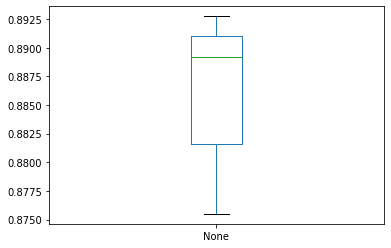

In [47]:
finalcross.plot.box()

The plot blox shows that the median score is 89% and that there is a deviation from 1%

#### Recording and plotting test vs train accuracy for GridSearchCV

In [48]:
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    test_accuracy[i] = knnfinal.score(X_test, y_test)
    train_accuracy[i] = knnfinal.score(X_train, y_train)

Text(0.5, 1.0, 'k-NN: Varying Number of Neighbors')

Text(0.5, 0, 'Number of Neighbors')

Text(0, 0.5, 'Accuracy')

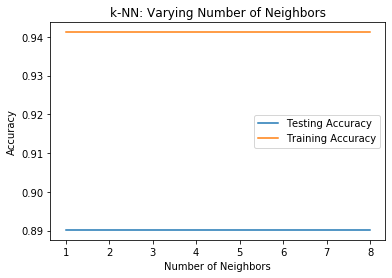

In [49]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### 3. Random Forest Classifier

In [50]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [51]:
model_rf = RandomForestClassifier(n_estimators=100)

In [52]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
y_pred = model_rf.predict(X_test)

In [54]:
rf_score = model_rf.score(X_test, y_test)
print(rf_score)

0.9943938534324426


**Random Forest has the highest performance and score with 99,46% accuracy**


#### Crossvalidation for Random Forest Classifier

In [55]:
rf_cv = pd.Series(cross_val_score(model_rf, crime_features, crime_target, cv=5))

In [56]:
print(rf_cv)

0    0.994471
1    0.995567
2    0.996000
3    0.994500
4    0.993297
dtype: float64


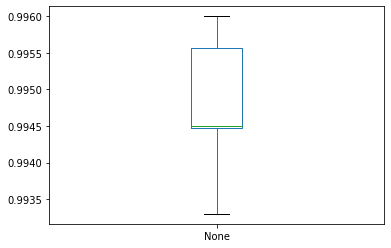

In [57]:
rf_cv.plot.box()

The plot blox shows that the median score is 99,46% and that there is a small deviation from 0,15%

# Conclusion

We managed to perform our model and applied the necassary ML Algortihms
The Random Classification was the fastest, most stable and most accurate, followed by the kNN-Neighbour Classifier. The Linear SVC Classifier had the lowest performance and score

In [60]:
classifier_comparison = pd.concat([svm_cv, finalcross, rf_cv ], axis=1)

In [61]:
classifier_comparison["index"] = list(classifier_comparison.index)
classifier_comparison.columns=(["SVM", "kNN", "RandomForest", "index"])
classifier_comparison

,SVM,kNN,RandomForest,index
0,0.435087,0.889194,0.994471,0
1,0.791188,0.891070,0.995567,1
2,0.815140,0.892751,0.996000,2
3,0.815140,0.881606,0.994500,3
4,0.815138,0.875489,0.993297,4


#### Dataset description

In [62]:
classifier_comparison.drop("index", axis=1).describe

<bound method NDFrame.describe of         SVM       kNN  RandomForest
0  0.435087  0.889194      0.994471
1  0.791188  0.891070      0.995567
2  0.815140  0.892751      0.996000
3  0.815140  0.881606      0.994500
4  0.815138  0.875489      0.993297>

Text(0.5, 1.0, 'Prediction Comparison between the Classifiers')

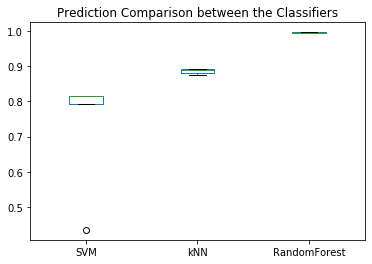

In [63]:
classifier_comparison.drop("index", axis=1).plot.box()
plt.title("Prediction Comparison between the Classifiers")
plt.show()

The plot shows that:

* **Random Forest** is the most accurate with the highest score and the best performance overall
* **kNN** is the second best performing with an high conistency
* **SVC** isn't performant at all and has a medium-high score

## We managed to build an model to predict the accuracy of an upcoming occurent primary offense using 3 different ML algorithm and by comparing each other